<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Python_220808_%EC%95%99%EC%83%81%EB%B8%94%EA%B8%B0%EB%B2%9502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **의사결정트리 + K-NN + SVM을 활용한 손글씨 분류 실습**
___
보팅 앙상블 손글씨 분류

배깅(Bagging) = 부트스트랩 + 어그리게이팅

#### **라이브러리 import**


In [26]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np

####**데이터 로드 및 학습데이터 / 테스트데이터 나누기**

In [27]:
np.random.seed(5)
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

####**단일 모델별 정확도 측정**

In [28]:
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=8, max_features=32) # 지니 계수 사용
knn = KNeighborsClassifier(n_neighbors=299)
svm = SVC(C=0.1, gamma=0.003, probability=True)

dtree.fit(x_train, y_train)
knn.fit(x_train, y_train)
svm.fit(x_train, y_train)

dtree_pred = dtree.predict(x_test)
knn_pred = knn.predict(x_test)
svm_pred = svm.predict(x_test)

print("[Accuarcy]")
print("d-tree: ", accuracy_score(y_test, dtree_pred))
print("k-nn: ", accuracy_score(y_test, knn_pred))
print("svm: ", accuracy_score(y_test, svm_pred))

[Accuarcy]
d-tree:  0.7916666666666666
k-nn:  0.8944444444444445
svm:  0.8916666666666667


####**분류값별 확률 확인**

In [29]:
svm_proba = svm.predict_proba(x_test)
print(svm_proba[0:2])

# 실제 x_test를 가지고 svm으로 분류하였을 때 어떻게 분류하였는지 확인
# 0은 5로, 1행은 2로 분류되었을 것

[[0.0020036  0.00913495 0.00860886 0.00431856 0.0047931  0.8975483
  0.0019513  0.01046554 0.04855539 0.0126204 ]
 [0.00290208 0.01165787 0.86869732 0.00809384 0.00503728 0.01857273
  0.00301187 0.00945009 0.05716773 0.0154092 ]]


####**하드보팅**

In [30]:
voting_model = VotingClassifier(estimators=[("Decision_Tree", dtree), ("K-NN", knn), ("SVM", svm)],
                                weights = [1, 1, 1], voting = "hard")
voting_model.fit(x_train, y_train)
hard_voting_pred = voting_model.predict(x_test)

accuracy_score(y_test, hard_voting_pred)

0.9472222222222222

####**소프트 보팅**

In [31]:
voting_model = VotingClassifier(estimators=[("Decision_Tree", dtree), ("K-NN", knn), ("SVM", svm)],
                                weights = [1, 1, 1], voting = "soft")
voting_model.fit(x_train, y_train)
soft_voting_pred = voting_model.predict(x_test)

accuracy_score(y_test, soft_voting_pred)

0.9333333333333333

####**정확도 비교 시각화**

In [32]:
x = np.arange(5)

([<matplotlib.axis.XTick at 0x7f92186054d0>,
 [Text(0, 0, 'decision tree'),
  Text(0, 0, 'knn'),
  Text(0, 0, 'svm'),
  Text(0, 0, 'hard voting'),
  Text(0, 0, 'soft voting')])

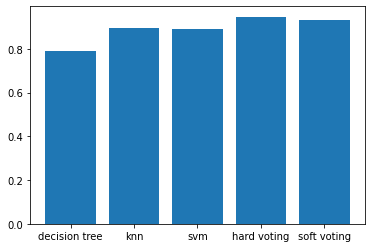

In [33]:
plt.bar(x, height=[accuracy_score(y_test, dtree_pred),
                   accuracy_score(y_test, knn_pred),
                   accuracy_score(y_test, svm_pred),
                   accuracy_score(y_test, hard_voting_pred),
                   accuracy_score(y_test, soft_voting_pred)])
plt.xticks(x, ['decision tree', 'knn', 'svm','hard voting', 'soft voting'])